In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [2]:
# Load the training data
# ratings_train = pd.read_csv("training_data(1).csv", converters={"genres": literal_eval, "tag": literal_eval})

# ratings_train.head()

In [3]:
# ratings_train.head()

In [4]:
# Load movie data
movies = pd.read_csv("movies_tmdb.csv")#, converters={"genres": literal_eval, "tag": literal_eval})

In [5]:
movies.head()

,Unnamed: 0,movieId,genres,overview,popularity,release_date,tagline,title,vote_average,vote_count
0,0,1,"['Adventure', 'Animation', 'Children', 'Comedy...","Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,NaN,Toy Story,7.7,5415.0
1,1,2,"['Adventure', 'Children', 'Fantasy']",When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,2,3,"['Comedy', 'Romance']",A family wedding reignites the ancient feud be...,11.712900,1995-12-22,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,3,4,"['Comedy', 'Drama', 'Romance']","Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,4,5,['Comedy'],Just when George Banks has recovered from his ...,8.387519,1995-02-10,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0


In [6]:
movies.shape

(58128, 10)

In [7]:
movies['tagline'] = movies['tagline'].fillna('')
movies['description'] = movies['overview'] + movies['tagline']
movies['description'] = movies['description'].fillna('')

In [72]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['description'])

In [73]:
tf.vocabulary_['']

481232

In [9]:
tfidf_matrix.shape

(58128, 1102766)

In [10]:
# http://scikit-learn.org/stable/modules/metrics.html#linear-kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [11]:
movies = movies.reset_index()
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])
indices.head(2)

title
Toy Story    0
Jumanji      1
dtype: int64

In [12]:
def get_recommendations(title):
    idx = indices[title]
    if type(idx) != np.int64:
        if len(idx)>1:
            print("ALERT: Multiple values")
            idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [13]:
get_recommendations('The Dark Knight').head(45)

ALERT: Multiple values


18450                                The Dark Knight Rises
151                                         Batman Forever
1348                                        Batman Returns
21486    Batman Unmasked: The Psychology of the Dark Kn...
15648                           Batman: Under the Red Hood
20486              Batman: The Dark Knight Returns, Part 2
46455                                The Lego Batman Movie
586                                                 Batman
25920                                    Batman vs Dracula
18226                                     Batman: Year One
9287                    Batman Beyond: Return of the Joker
45282    LEGO DC Comics Super Heroes: Batman: Be-Leaguered
31147                           The Magnificent Dare Devil
31809                                              Accused
46462    Batman Beyond Darwyn Cooke's Batman 75th Anniv...
22354                                       The Super Cops
24382                            In Order of Disappearan

In [14]:
get_recommendations('The Godfather').head(10)

48729    The Godfather Trilogy: 1972-1990
1197               The Godfather: Part II
34322                    Honor Thy Father
21920                          The Family
23549                          Blood Ties
41614            A Mother Should Be Loved
18522                     The Outside Man
11373                    Household Saints
10896                            Election
4360                                 Made
Name: title, dtype: object

In [15]:
get_recommendations('Toy Story').head(10)

3030                                      Toy Story 2
15480                                     Toy Story 3
25089                                       Small Fry
10370                          The 40 Year Old Virgin
24350                     Andy Hardy's Blonde Trouble
8375                                        The Champ
48091                Andy Kaufman Plays Carnegie Hall
3090                                  Man on the Moon
42153    Superstar: The Life and Times of Andy Warhol
47296    Andy Peters: Exclamation Mark Question Point
Name: title, dtype: object

In [16]:
get_recommendations('Jumanji').head(10)

21939                  Table No. 21
9566                      Word Wars
47747                       The Bar
8852                        Quintet
17400                The Dark Angel
40810            The Ouija Exorcism
49113             Liar Game: Reborn
15649               Le Pont du Nord
37660    Doctor Who: Last Christmas
38564                      The Mend
Name: title, dtype: object

In [17]:
get_recommendations('Doctor Who: Last Christmas').head(10)

314                          The Santa Clause
16254                 How I Ended This Summer
42025                             Santa Claus
46467                 The Spirit of Christmas
22527    The Life & Adventures of Santa Claus
2316                   Miracle on 34th Street
37762        The Christmas That Almost Wasn't
25725                              Santa Who?
40212    The Life & Adventures of Santa Claus
8908               Silent Night, Deadly Night
Name: title, dtype: object

In [18]:
movies[movies['title'] == 'Doctor Who: Last Christmas']['genres'].values[0]

"['Adventure', 'Drama', 'Fantasy', 'Sci-Fi']"

In [19]:
movies[movies['title'] == 'Doctor Who: Last Christmas']['overview'].values[0]

'The Doctor and Clara face their Last Christmas. Trapped on an Arctic base, under attack from terrifying creatures, who are you going to call? Santa Claus!'

In [20]:
get_recommendations('Inception').head(10)

49042                   III
7508                 Cypher
160                   Crumb
10983           Renaissance
9150              The Brave
26142    Closer to the Moon
30806         Dear Murderer
34372              Hollywoo
22995      The Monkey's Paw
20621        A Woman's Face
Name: title, dtype: object

In [21]:
movies[movies['title'] == 'III']['overview'].values[0]

"A small European town, where sisters Ayia and Mirra live, gets struck down by an unknown disease which takes many lives. Following their mother's death, the younger sister falls ill. Having realized that conventional medicine is useless in the face of the sister's disease, Ayia seeks help from Father Herman, a parish priest and a close family friend. In his house she finds books that are very far from the conventional religion. She gets to know that only penetration into Mirra's sick subconscious mind and discovery of the true cause of her disease will give her a chance to save her sister. Ayia is ready to go through this terrifying ritual, dive into the depths of the subconscious mind, and face the demons residing there."

In [22]:
movies[movies['title'] == 'Inception']['overview'].values[0]

'Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious.'

In [23]:
popularity_df = movies[['popularity', 'vote_average', 'vote_count']]
popularity_df.corr()

,popularity,vote_average,vote_count
popularity,1.000000,0.154253,0.559918
vote_average,0.154253,1.000000,0.123681
vote_count,0.559918,0.123681,1.000000


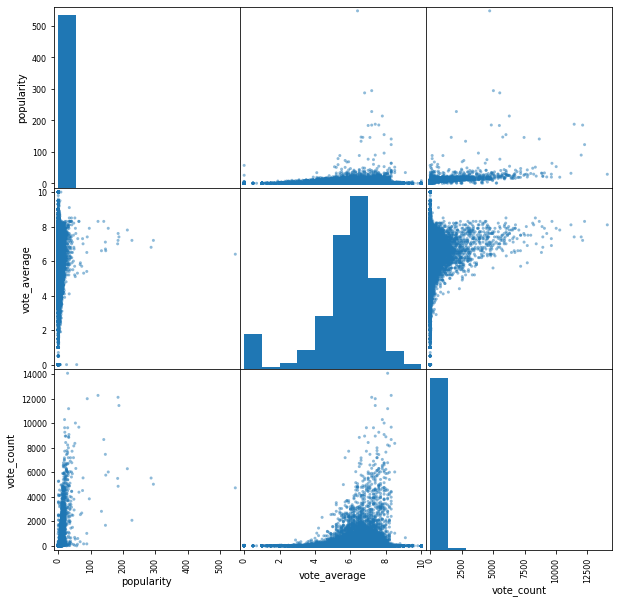

In [24]:
pd.plotting.scatter_matrix(popularity_df, figsize=(10, 10))
plt.show()

In [17]:
movies['tagline'] = movies['tagline'].fillna('')
movies['description_genre'] = movies['overview'] + movies['tagline'] + 2*movies['genres']
movies['description_genre'] = movies['description_genre'].fillna('')

In [18]:
tf_new = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix_new = tf_new.fit_transform(movies['description_genre'])

In [19]:
cosine_sim_new = linear_kernel(tfidf_matrix_new, tfidf_matrix_new)

In [20]:
tf_new.vocabulary_['scifi']

873101

In [21]:
movies = movies.reset_index()
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])
indices.head(2)

title
Toy Story    0
Jumanji      1
dtype: int64

In [22]:
def get_recommendations_new(title):
    idx = indices[title]
    if type(idx) != np.int64:
        if len(idx)>1:
            print("ALERT: Multiple values")
            idx = idx[0]
    sim_scores = list(enumerate(cosine_sim_new[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [23]:
get_recommendations_new('Doctor Who: Last Christmas').head(10)

30647                         20 Years After
19000                 4:44 Last Day on Earth
38193    Wizards of Waverly Place: The Movie
36355                     Under the Mountain
10418                         Born in Flames
45510                              Team Thor
28                 The City of Lost Children
20474              It's Such a Beautiful Day
27268                    Master of the World
40678                           On the Comet
Name: title, dtype: object

In [24]:
movies[movies['title'] == 'Doctor Who: Last Christmas']['genres'].values

array(["['Adventure', 'Drama', 'Fantasy', 'Sci-Fi']"], dtype=object)

In [27]:
movies[movies['title'] == "It's Such a Beautiful Day"]['genres'].values

array(["['Animation', 'Comedy', 'Drama', 'Fantasy', 'Sci-Fi']",
       "['Animation', 'Comedy', 'Drama']"], dtype=object)

In [ ]:
movies[movies['title'] == 'Doctor Who: Last Christmas']['overview'].values

In [ ]:
movies[movies['title'] == '4:44 Last Day on Earth']['overview'].values

In [ ]:
movies[movies['title'] == '20 Years After']['genres'].values

In [ ]:
movies[movies['title'] == '20 Years After']['overview'].values

In [83]:
get_recommendations_new('Inception').head(10)

12901                  Watchmen
21110                Iron Man 3
6826     The Matrix Revolutions
27816         Talking to Heaven
20806     G.I. Joe: Retaliation
26568                 Implanted
12007              Transformers
43137                Wild Palms
10914            V for Vendetta
9504                 The Jacket
Name: title, dtype: object

In [33]:
movies[movies['title'] == 'Game Over']['description_genre'].values

array(["...['Crime', 'Drama', 'Thriller']",
       "Short depicting the endings of various classic video games in a whimsical fashion.['Drama']"],
      dtype=object)

In [34]:
movies[movies['title'] == 'Inception']['description_genre'].values

array(['Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious.Your mind is the scene of the crime.[\'Action\', \'Crime\', \'Drama\', \'Mystery\', \'Sci-Fi\', \'Thriller\', \'IMAX\']'],
      dtype=object)

In [59]:
get_recommendations_new('Avatar').head(10)

18192                  The War of the Robots
30230                   Stand by Me Doraemon
49100      Abraxas, Guardian of the Universe
16220                          Bloodbrothers
2489                              The Matrix
48131                              Megafault
18758       Journey 2: The Mysterious Island
13931    Transformers: Revenge of the Fallen
13985                   The Inhabited Island
22239                           Ender's Game
Name: title, dtype: object

### IMDB Weighted Average 

In [29]:
# this is V
vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')

# this is R
vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')

# this is C
C = vote_averages.mean()
C

5.246875482178676

In [30]:
m = vote_counts.quantile(0.95)
m

434.0

In [31]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [32]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_new[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies_x = movies.iloc[movie_indices][['title', 'vote_count', 'vote_average']]
    vote_counts = movies_x[movies_x['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies_x[movies_x['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies_x[(movies_x['vote_count'] >= m) & (movies_x['vote_count'].notnull()) &
                       (movies_x['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [33]:
improved_recommendations('Doctor Who: Last Christmas').head(10)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,title,vote_count,vote_average,wr
28,The City of Lost Children,308,7,5.974588
38193,Wizards of Waverly Place: The Movie,323,6,5.568222
20474,It's Such a Beautiful Day,94,7,5.558985
45510,Team Thor,93,7,5.556250
22106,After the Dark,283,6,5.544134
46593,Marvel One-Shot: A Funny Thing Happened on the...,72,7,5.496332
7521,Frank Herbert's Dune,114,6,5.403547
9410,Immortal,131,5,5.189635
23179,The Zero Theorem,383,5,5.131143
19000,4:44 Last Day on Earth,48,4,5.122705


In [34]:
improved_recommendations('Avatar').head(10)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,title,vote_count,vote_average,wr
18006,The Avengers,12000,7,6.938808
27564,Star Wars: The Force Awakens,7993,7,6.909712
13738,Star Trek,4574,7,6.848072
21207,Star Trek Into Darkness,4479,7,6.845134
21356,Man of Steel,6462,6,5.952602
21028,Oblivion,4862,6,5.938282
7957,Spider-Man 2,4432,6,5.932829
23811,Godzilla,3232,6,5.910841
13931,Transformers: Revenge of the Fallen,3192,6,5.909858
6826,The Matrix Revolutions,3155,6,5.908928
